Let's do a rough job by directly fishing information out of the files (not extracting to a databse) and extracting what we want from there.

First, look at keyword popularity through time.

Second, the more interesting thing is how professors choose different keywords over time. The more 'advanced' thing would be to identify research areas by clustering (either keywords or citations) and watching people 'jump' from one group to another.

Fish out keywords and authors from the json files for PR articles. In the future this should be replaced with a database.

In [1]:
%matplotlib inline
import os
import sys
import json
from dateutil import parser
from datetime import date, timedelta
import re
from nltk.corpus import stopwords
s=stopwords.words('english') + ['', 'using']
import time
import itertools
from collections import Counter
from matplotlib import pyplot as plt
import numpy as np
import copy

In [2]:
def cleanup(text):
    return re.sub("<.*?>", "", text.replace('(','').replace(')','').replace(';',' ').replace(':',' ').lower())

def wordsToList(text):
    return [x for x in re.sub("<.*?>", "", text.lower()).split(' ') if (x not in s)]

In [3]:
# Walk through directory
baseDirectories = ['../aps-dataset-metadata-2013/PR/', '../aps-dataset-metadata-2013/PRL/']

# baseDirectories = ['../aps-dataset-metadata-2013/PR/']

# There are no abstracts! WTF?
titles = []
datestamp = []

start = time.time()

# abort = False
for basedir in baseDirectories:
    for (dirpath, dirnames, filenames) in os.walk(basedir):
        for currentFile in filenames:
            if currentFile.endswith('.json'):
                with open(os.path.join(dirpath, currentFile), 'r') as f:
                    data = json.load(f)
#                     try:
                    titles.append(cleanup(data['title']['value']))
                    datestamp.append(parser.parse(data['date']).date())
#                     except e:
#                         print e
#                         print data
#                 abort = True
#                 break
#         if abort:
#             break
#     if abort:
#         break
final = time.time()
print "%0.1f articles/second (%i articles in %0.1f seconds)" % (len(titles)/(final-start), len(titles), final-start)

4933.7 articles/second (158020 articles in 32.0 seconds)


In [4]:
# print sys.getsizeof(titles)
# print cleanup(data['title']['value'])
# print parser.parse(data['date'])
# print data

We're going to do two types of analysis here. First, just count up keyword frequency and plot them. Second, use the more advanced scikit-learn tools to make predictions (of what?!?) or look for clustering. The scikit tools, in princple, can also reproduce the results of the keyword frequency.

In [5]:
start = time.time()
words_list_generator = itertools.chain(*[wordsToList(x) for x in titles])
word_frequency = Counter(words_list_generator)
numWords = sum(x for x in word_frequency.itervalues())
top_words = word_frequency.most_common(15)
print numWords
# top_words
print '%0.1f sec' % (time.time() - start)

1039443
5.0 sec


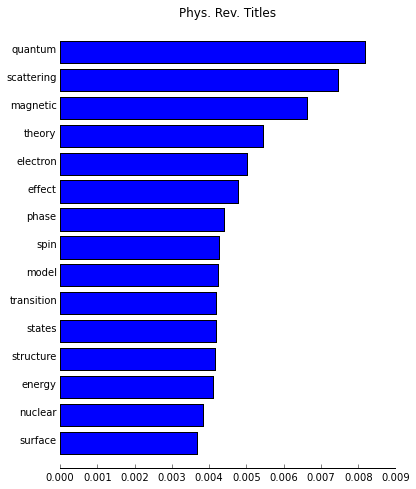

In [6]:
# Top 15 words
words = [x[0] for x in top_words]
vals = np.array([x[1] for x in top_words])*1./numWords
ind = np.flipud(np.arange(0, len(words)))
# c = ['b' if x > 0 else 'r' for x in vals]

plt.figure(frameon=False, figsize=(6,8))
plt.barh(ind - 0.5,
         vals)
plt.yticks(ind, words)
plt.ylim(-1., ind[0]+1)
plt.xlim(0, 1.1*np.max(np.abs(vals)))
plt.title('Phys. Rev. Titles')
# plt.xlabel('PRL$\qquad\qquad\qquad\qquad$Nature/Science')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('none')

Now, do the same analysis by year.

In [7]:
first = min(datestamp)
last = max(datestamp)
bins = [date(x, 1, 1) for x in range(first.year, last.year+2)]

In [8]:
# start = time.time()
# favorite_words = [x[0] for x in top_words] + ['ultracold', 'ultrafast', 'attosecond']
# favorite_words_frequency = dict([(x, []) for x in favorite_words])

# for (fromdate, todate) in zip(bins[:-1], bins[1:]):
# #     print (fromdate, todate)
# #     ind = filter(lambda x: (x[0] >= fromdate and x[0] < todate), itertools.izip(datestamp, titles))
# #     ind = [x[1] for x in zip(datestamp, titles) if (x[0] >= fromdate and x[0] < todate)]
#     currentTitles = [x[1] for x in itertools.izip(datestamp, titles) if (x[0] >= fromdate and x[0] < todate)]
# #     print ind
#     words_list_generator = itertools.chain(*[wordsToList(x) for x in currentTitles])
#     word_frequency = Counter(words_list_generator)
#     numWords = sum(x for x in word_frequency.itervalues())
#     for word in favorite_words_frequency:
#         if word in word_frequency:
#             favorite_words_frequency[word].append(word_frequency[word]*1./numWords)
#         else:
#             favorite_words_frequency[word].append(0)
# #     break
# print "%0.1f" % (time.time() - start)

In [9]:
# for key, val in favorite_words_frequency.iteritems():
#     plt.plot(bins[:-1], val, label=key)
# plt.legend(bbox_to_anchor=(1.02, 0., 0.8, 1.), loc=3,
#            ncol=2, mode="expand", borderaxespad=0.)

In [10]:
# look at picosecond, femtosecond, attosecond
def word_frequency_plot(wordList):
    favorite_words_frequency = dict([(x, []) for x in wordList])

    for (fromdate, todate) in zip(bins[:-1], bins[1:]):
    #     print (fromdate, todate)
    #     ind = filter(lambda x: (x[0] >= fromdate and x[0] < todate), itertools.izip(datestamp, titles))
    #     ind = [x[1] for x in zip(datestamp, titles) if (x[0] >= fromdate and x[0] < todate)]
        currentTitles = [x[1] for x in itertools.izip(datestamp, titles) if (x[0] >= fromdate and x[0] < todate)]
    #     print ind
        words_list_generator = itertools.chain(*[wordsToList(x) for x in currentTitles])
        word_frequency = Counter(words_list_generator)
        numWords = sum(x for x in word_frequency.itervalues())
        for word in favorite_words_frequency:
            if word in word_frequency:
                favorite_words_frequency[word].append(word_frequency[word]*1./numWords)
            else:
                favorite_words_frequency[word].append(0)
#         break
#     return favorite_words_frequency
    plt.figure(figsize=(6,4))
    for key, val in favorite_words_frequency.iteritems():
        plt.plot(bins[:-1], val, label=key)
    plt.legend(bbox_to_anchor=(1.02, 0., 0.3, 1.), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)
    plt.xlabel('Year')
    plt.ylabel('Freq. per year')
    plt.title('Frequency of words in PR and PRL titles')

Let's make an interaction website that generates these plots.

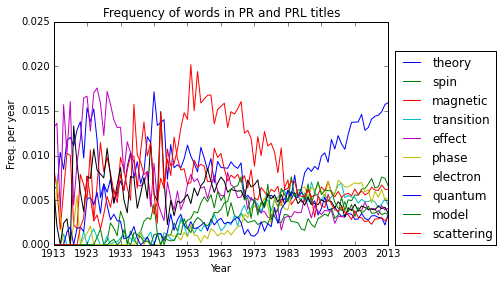

In [11]:
word_frequency_plot([x[0] for x in word_frequency.most_common(10)])

7.80900788307


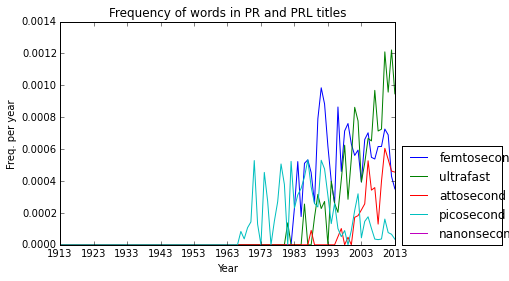

In [12]:
start = time.time()
word_frequency_plot(['ultrafast', 'nanonsecond', 'picosecond', 'femtosecond', 'attosecond'])
print time.time() - start

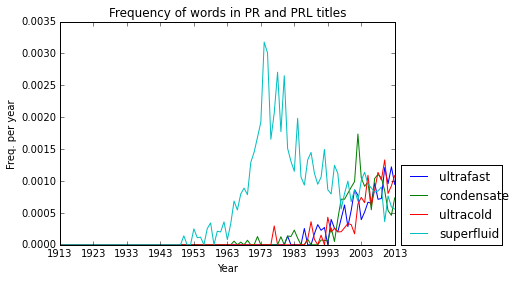

In [13]:
word_frequency_plot(['ultrafast', 'ultracold', 'superfluid', 'condensate'])

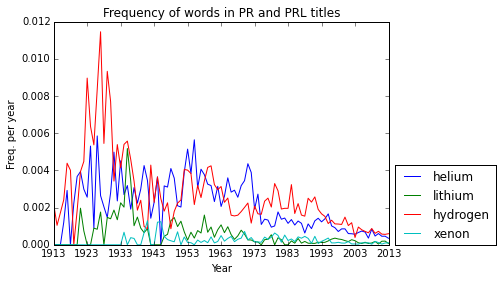

In [14]:
word_frequency_plot(['hydrogen', 'helium', 'lithium', 'xenon'])

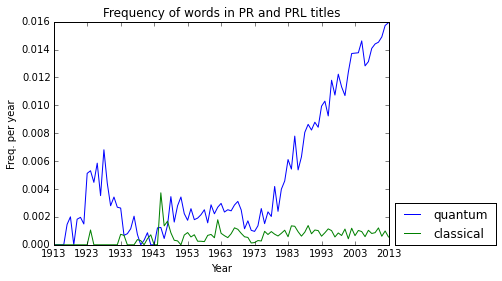

In [15]:
word_frequency_plot(['quantum', 'classical'])

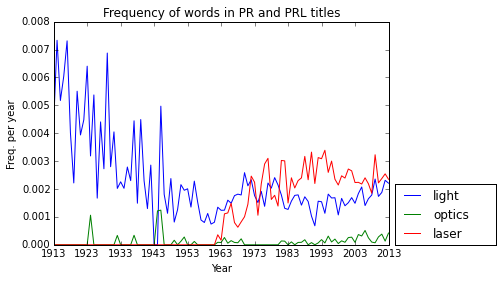

In [16]:
word_frequency_plot(['laser', 'light', 'optics'])

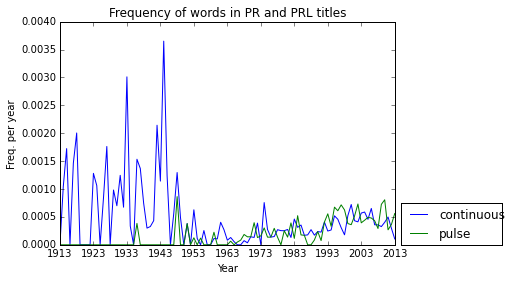

In [17]:
word_frequency_plot(['pulse', 'continuous'])

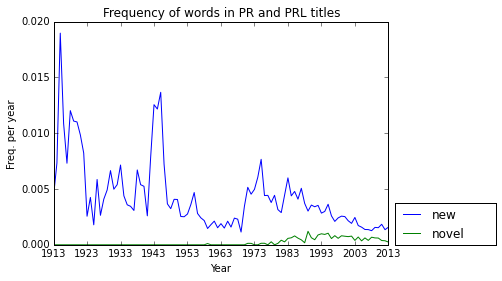

In [18]:
word_frequency_plot(['new', 'novel'])

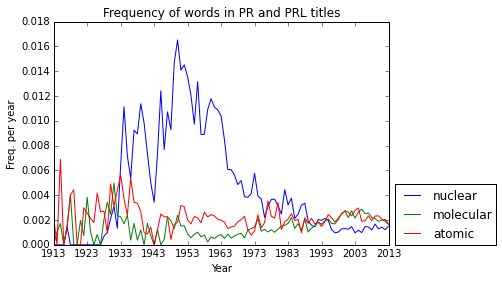

In [19]:
word_frequency_plot(['atomic', 'molecular', 'nuclear'])

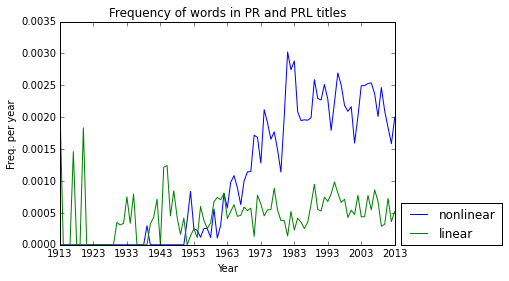

In [20]:
word_frequency_plot(['linear', 'nonlinear'])

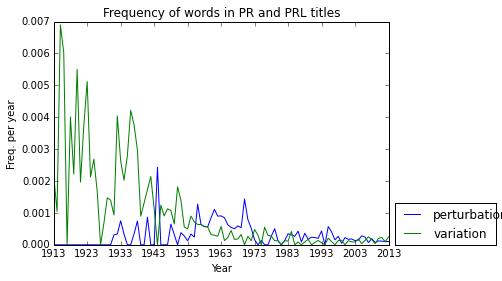

In [21]:
word_frequency_plot(['perturbation','variation'])

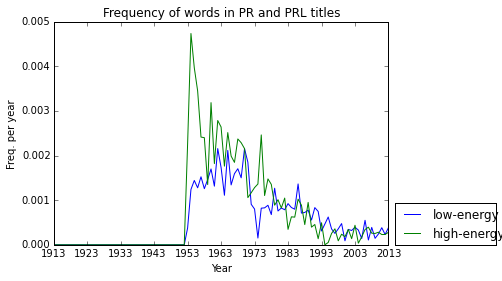

In [22]:
word_frequency_plot(['high-energy','low-energy'])

In [23]:
print word_frequency['non-linear']
print word_frequency['nonlinear']
print word_frequency['nuclear']
print word_frequency['nucleus']
print word_frequency['particle']
print word_frequency['high-energy']
print word_frequency['low-energy']

11
1707
3979
285
791
880
703
